In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import gc

## Lecture des données

In [2]:
data=pd.read_csv('./crimes.csv',sep=';',header=0)
data.head(3)

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5


In [3]:
X=data.iloc[:,1:8].values
labels=data.iloc[:,0].values

## Importation des bibliothèques

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Normalisation

In [5]:
SS=StandardScaler()
SS.fit(X)
Xnorm=SS.transform(X)

#Xnorm=SS.fit_transform(X) ###A éviter quand des futures de données peuvent arriver

In [6]:
Xnorm[0,:]

array([ 1.76493364, -0.05013383, -0.31204901,  0.67509389, -0.3653366 ,
       -1.0984884 , -0.50574898])

## PCA

In [8]:
pca=PCA(n_components=2)
pca.fit(Xnorm)

PCA(n_components=2)

#### Bon à savoir 

### Les valeurs propres sélectionnées

In [12]:
pca.explained_variance_

array([4.19893828, 1.26400187])

### Information (variance) expriquée par valauer propre

In [13]:
pca.explained_variance_ratio_

array([0.58785136, 0.17696026])

### Interprétation des axes

In [14]:
pca.components_

array([[ 0.30027916,  0.43175936,  0.39687549,  0.3966517 ,  0.44015721,
         0.35735953,  0.29517681],
       [-0.62917444, -0.16943512,  0.04224698, -0.34352815,  0.20334059,
         0.40231912,  0.50242093]])

#### Bon à savoir 

#### Axe 1

In [15]:
pca.components_[0,:]

array([0.30027916, 0.43175936, 0.39687549, 0.3966517 , 0.44015721,
       0.35735953, 0.29517681])

On garde les variables 2,3,4,5 et 6 pour la contribution du premier axe

axe de crime 

#### Axe 2

In [16]:
pca.components_[1,:]

array([-0.62917444, -0.16943512,  0.04224698, -0.34352815,  0.20334059,
        0.40231912,  0.50242093])

On garde les variables 1,4,5 et 6 pour la contribution du deuxieme axe

axe des delis, plus nous somme en haut de l'axe plus les nous aurons des villes avec des petits delis.

### Cercle de correlartion

Text(0.5, 1.0, 'Circle of Correlations')

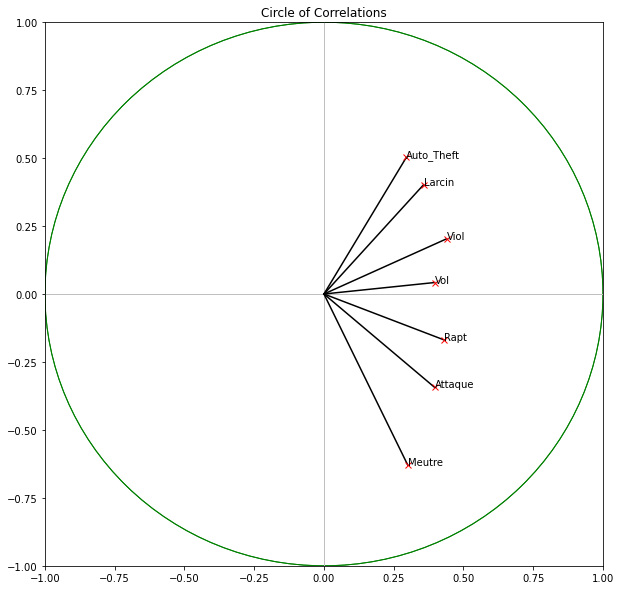

In [19]:
coef = np.transpose(pca.components_)
cols = ['y'+str(x+1) for x in range(2)]

pc_infos=pd.DataFrame(coef,columns=cols, index=data.iloc[:,1:].columns)

plt.Circle((0,0),radius=10, color='g', fill=False)
circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
# Ajouter les axes et donner la limite pour chaque axe
fig, axes= plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
fig.gca().add_artist(circle1)
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
axes.add_artist(circle1)
# Affichage de chaque variable explicative dans la cercle
for idx in range(len(pc_infos["y1"])):
    x = pc_infos["y1"][idx]
    y = pc_infos["y2"][idx]
    plt.plot([0.0,x],[0.0,y],'k-')
    plt.plot(x, y, 'rx')
    plt.annotate(pc_infos.index[idx], xy=(x,y))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.title("Circle of Correlations")


### Projection des données sur les nouveaux axes

In [20]:
X_pca=pca.transform(Xnorm)

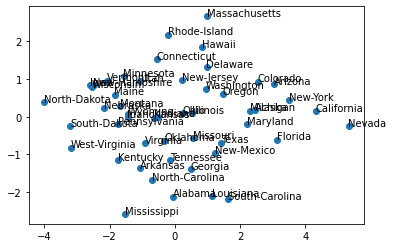

In [22]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()


In [43]:
df = pd.DataFrame(X_pca,index=labels)

In [47]:
import plotly.express as px
fig = px.scatter(df, x=0, y=1, text=df.index)
fig

### Etudes